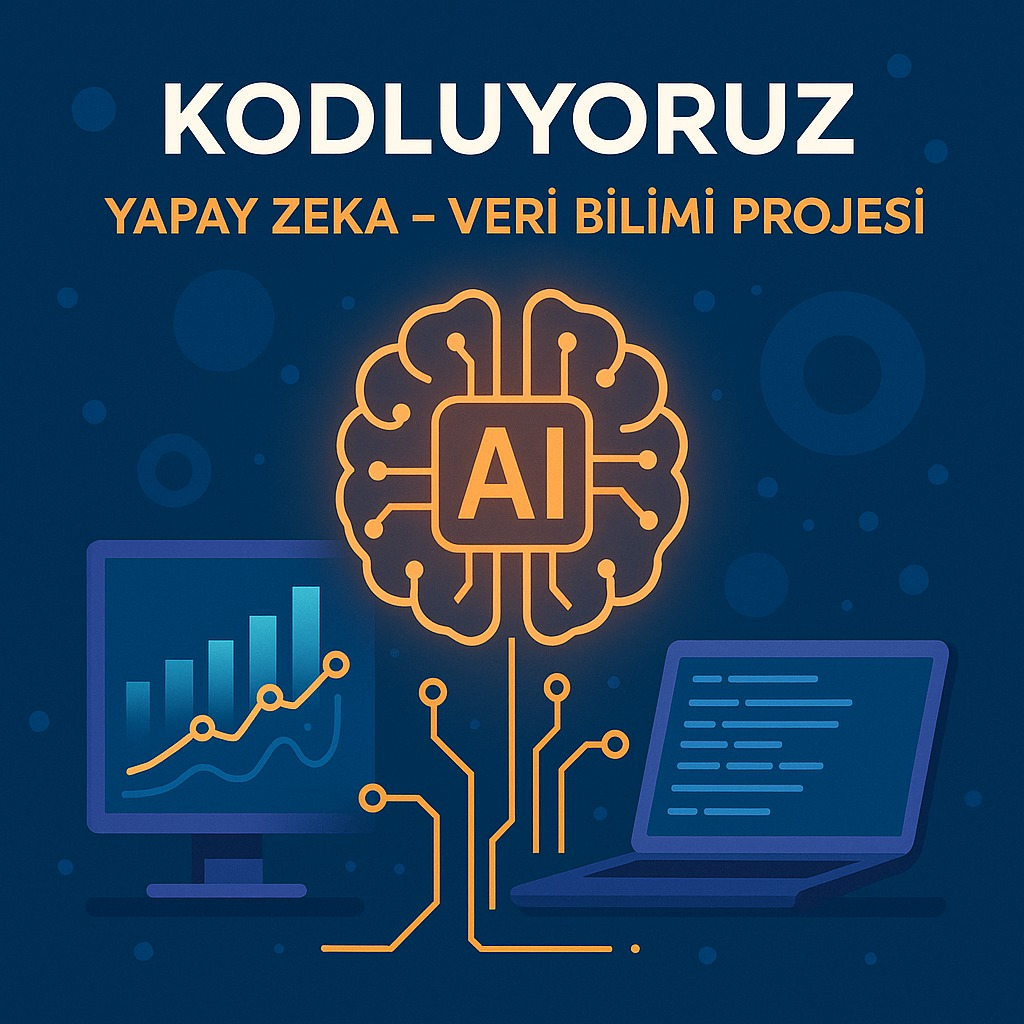

# Öğrenci Başarısında Etkili Faktörler: Veri Odaklı Bir Analiz

## Veri Seti Hakkında

Bu projede kullanılan veri seti, öğrencilerin sınav başarısını (Exam Score) etkileyebilecek çok çeşitli sosyo-ekonomik, kişisel ve çevresel faktörleri kapsamaktadır. Veri setinde; öğrencilerin haftalık çalışma saatleri, devamsızlık oranı, uyku süresi ve önceki sınav puanları gibi sayısal değişkenlerin yanı sıra, aile desteği, motivasyon seviyesi, internet erişimi ve gelir durumu gibi kategorik değişkenler de yer almaktadır.

Toplamda 6600'den fazla öğrencinin bilgilerinin bulunduğu bu kapsamlı veri seti, hem sayısal hem de kategorik değişkenler içermesi sayesinde farklı makine öğrenmesi algoritmaları ile analiz edilmeye uygundur. Bu çalışma ile, eğitimde veri odaklı kararlar almak ve öğrenci başarısını artırmaya yönelik etkili stratejiler geliştirmek için önemli ipuçları elde edilmesi amaçlanmaktadır.

## Projenin Amacı

Bu projede, öğrencilerin sınav başarısı üzerinde etkili olan çeşitli faktörler  analiz edilmiştir. Projenin temel amacı, başarıya en fazla etki eden değişkenleri belirlemek ve bu faktörler üzerinden öğrencilerin sınav performansını öngörebilen bir model geliştirmektir. Elde edilen bulguların, öğrenci başarısının artırılması ve eğitimde fırsat eşitliğinin sağlanmasına yönelik stratejilere katkı sunması hedeflenmektedir.



- Öğrencilerin sınav başarısını etkileyen faktörleri belirlemek.

- En önemli değişkenleri ortaya çıkarmak.

- Sınav puanlarını makine öğrenimi ile tahmin etmek.

- Eğitimde fırsat eşitsizliği veya başarıyı artıracak politika önerileri geliştirmek.

## İzlenilecek Yöntemler ve Adımlar

1. **Veri Yükleme ve Temizleme**
   - Eksik değerler analiz edildi ve uygun yöntemlerle dolduruldu.

2. **Keşifsel Veri Analizi**
   - Temel istatistikler ve görselleştirmeler ile veri tanındı.
   - Sınav puanı dağılımı ve kategorik değişkenlerin etkisi incelendi.

3. **Veri Ön İşleme**
   - Kategorik değişkenler one-hot encoding ile sayısala çevrildi.

4. **Modelleme**
   - Doğrusal Regresyon ve Random Forest algoritmaları kullanıldı.
   - Eğitim/test ayrımı ile model başarıları karşılaştırıldı.

5. **Özellik Mühendisliği**
   - Aile gelir seviyesi gibi bazı değişkenler kategorilere ayrılmış, yeni  
     değişkenler oluşturulmuştur.

6. **Özellik Önem Derecesi Analizi**
   - En etkili değişkenler görselleştirildi.

7. **Model Karşılaştırması**
   - Modellerin MSE ve R2 skorları yan yana sunuldu.

## Veri Setinin Tanıtılması

Analizimize başlamadan önce, veri setimizin sahip olduğu değişkenleri ve bu değişkenlerin anlamlarını açıklıyoruz.


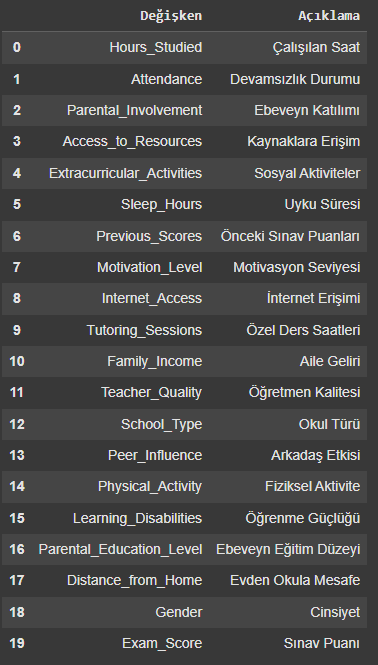

Veri setimiz, öğrencilerin sınav başarısını etkileyebilecek çok sayıda bireysel, ailevi ve çevresel değişken içermektedir. Bu nedenle analizimizde çok boyutlu bir yaklaşım sergileyebileceğiz.

## Gerekli Kütüphanelerin Yüklenmesi

Veri analizi, görselleştirme ve modelleme işlemleri için pandas, numpy, matplotlib ve seaborn kütüphaneleri projeye dahil edilmiştir.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Değişkenler ve Açıklamaları Tablosu

Çalışmada kullanılan tüm değişkenler ve kısa açıklamaları aşağıdaki tabloya aktarılmıştır. Bu tablo, analizde yer alan değişkenlerin anlamlarını özetlemektedir.

In [88]:
data = {
    'Değişken': [
        'Hours_Studied', 'Attendance', 'Parental_Involvement',
        'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
        'Previous_Scores', 'Motivation_Level', 'Internet_Access',
        'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
        'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
        'Parental_Education_Level', 'Distance_from_Home', 'Gender',
        'Exam_Score'
    ],
    'Açıklama': [
        'Çalışılan Saat', 'Devamsızlık Durumu', 'Ebeveyn Katılımı',
        'Kaynaklara Erişim', 'Sosyal Aktiviteler', 'Uyku Süresi',
        'Önceki Sınav Puanları', 'Motivasyon Seviyesi', 'İnternet Erişimi',
        'Özel Ders Saatleri', 'Aile Geliri', 'Öğretmen Kalitesi', 'Okul Türü',
        'Arkadaş Etkisi', 'Fiziksel Aktivite', 'Öğrenme Güçlüğü',
        'Ebeveyn Eğitim Düzeyi', 'Evden Okula Mesafe', 'Cinsiyet',
        'Sınav Puanı'
    ]
}


df = pd.DataFrame(data)


df

,Değişken,Açıklama
0,Hours_Studied,Çalışılan Saat
1,Attendance,Devamsızlık Durumu
2,Parental_Involvement,Ebeveyn Katılımı
3,Access_to_Resources,Kaynaklara Erişim
4,Extracurricular_Activities,Sosyal Aktiviteler
5,Sleep_Hours,Uyku Süresi
6,Previous_Scores,Önceki Sınav Puanları
7,Motivation_Level,Motivasyon Seviyesi
8,Internet_Access,İnternet Erişimi
9,Tutoring_Sessions,Özel Ders Saatleri


# Veri Setinin Yüklenmesi

Google Colab ortamında, yerel bilgisayardan veri dosyasını yüklemek için gerekli kod bloğu kullanılmıştır. files.upload() fonksiyonu ile dosya seçimi yapılır ve yüklenen dosyalar üzerinde analiz gerçekleştirilebilir.

In [ ]:
from google.colab import files
uploaded = files.upload()

# Veri Setinin Önizlemesi

Yüklenen veri setinin ilk 5 satırı görüntülenerek verinin yapısı ve örnek değerleri incelenmiştir.

In [90]:
df.head()

,Değişken,Açıklama
0,Hours_Studied,Çalışılan Saat
1,Attendance,Devamsızlık Durumu
2,Parental_Involvement,Ebeveyn Katılımı
3,Access_to_Resources,Kaynaklara Erişim
4,Extracurricular_Activities,Sosyal Aktiviteler


# Veri Setinin İlk 10 Satırının Görüntülenmesi

Veri setinin ilk 10 satırı görüntülenerek, verinin yapısı ve içerdiği örnek değerler daha ayrıntılı bir şekilde incelenmiştir.

In [91]:
df.head(10)

,Değişken,Açıklama
0,Hours_Studied,Çalışılan Saat
1,Attendance,Devamsızlık Durumu
2,Parental_Involvement,Ebeveyn Katılımı
3,Access_to_Resources,Kaynaklara Erişim
4,Extracurricular_Activities,Sosyal Aktiviteler
5,Sleep_Hours,Uyku Süresi
6,Previous_Scores,Önceki Sınav Puanları
7,Motivation_Level,Motivasyon Seviyesi
8,Internet_Access,İnternet Erişimi
9,Tutoring_Sessions,Özel Ders Saatleri


# Veri Dosyasının Okunması ve İlk Satırların Görüntülenmesi

Yüklenen "StudentPerformanceFactors.csv" veri dosyası pandas ile okunmuş ve ilk 5 satırı görüntülenerek veri setinin yapısı incelenmiştir.

In [92]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# Veri Setinin İlk 10 Satırının İncelenmesi

Veri setinin ilk 10 satırı görüntülenerek, veri yapısı ve değerler daha detaylı bir şekilde incelenmiştir.

In [93]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


# Veri Setinin Yapısal Bilgisi (info())

Veri setinin sütun isimleri, veri tipleri ve eksik değer durumu gibi temel yapısal bilgileri info() fonksiyonu ile görüntülenmiştir.

In [94]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# Veri Setindeki Sütunların Listelenmesi ve İlk Satırların Görüntülenmesi

Veri setinde yer alan tüm sütun adları listelenmiş ve ardından veri setinin ilk 5 satırı tekrar görüntülenerek sütun yapısı ve örnek veriler incelenmiştir.

In [95]:
print(df.columns)
print(df.head())

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                  

#  Veri Setinin Boyutunun İncelenmesi

Veri setinin satır (gözlem) ve sütun (özellik) sayısı .shape özelliği ile öğrenilmiştir.

In [96]:
df.shape

(6607, 20)

# Eksik Veri Kontrolü

Veri setindeki her bir sütunda bulunan eksik değerlerin toplamı kontrol edilmiştir. Bu sayede veri ön işleme aşamasında eksik veri olup olmadığı tespit edilmiştir.

In [97]:
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


# Kategorik Değişkenlerde Eksik Değerlerin Mod ile Doldurulması

Veri setinde bulunan ve kategorik olan 'Teacher_Quality', 'Parental_Education_Level' ve 'Distance_from_Home' sütunlarındaki eksik değerler, ilgili sütunun en sık görülen (mod) değeri ile doldurulmuştur.

In [98]:
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Eksik Veri Kontrolü (Düzenlemeden Sonra)

Eksik değerleri doldurma işlemlerinden sonra veri setinde kalan eksik değerler tekrar kontrol edilmiştir.

In [99]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


# Eksik Veri Son Kontrolü

Tüm eksik veri doldurma işlemlerinden sonra veri setindeki eksik değerlerin son durumu kontrol edilmiştir.

In [100]:
print(df.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


# Veri Setinin Tamamının Görüntülenmesi

Veri setinin tamamı ekrana yazdırılmıştır. Büyük veri setlerinde bu işlem önerilmez; genellikle ilk birkaç satır veya özet bilgiler görüntülenir. Ancak, tüm veri üzerinde detaylı kontrol veya inceleme gerektiğinde kullanılabilir.

In [101]:
print(df)

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                     

# İstatistiksel Özelliklerin Özeti

Veri setindeki sayısal sütunlara ait temel istatistiksel özetler (count, mean, std, min, max, 25%, 50%, 75%) elde edilmiştir. Bu özetler, veri setindeki dağılım ve olası aykırı değerler hakkında ilk izlenimi edinmek için kullanılır.

In [102]:
print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

# Sütunların Veri Tiplerinin İncelenmesi

Veri setindeki tüm sütunların veri tipleri (dtype) incelenmiştir. Bu bilgi, her sütunun hangi veri türünde (örneğin, int, float, object) tutulduğunu gösterir.

In [103]:
df.dtypes

,0
Hours_Studied,int64
Attendance,int64
Parental_Involvement,object
Access_to_Resources,object
Extracurricular_Activities,object
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,object
Internet_Access,object
Tutoring_Sessions,int64


#  Kategorik Değişkenlerdeki Benzersiz Değerlerin ve Frekanslarının İncelenmesi

Veri setindeki tüm kategorik değişkenler (object tipindeki sütunlar) için benzersiz değerler ve her birinin frekansı incelenmiştir. Bu analiz, kategorik değişkenlerin dağılımı ve olası tutarsız/az rastlanan değerlerin tespiti açısından önemlidir.

In [104]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col} - unique values:")
    print(df[col].value_counts())
    print("\n")

Parental_Involvement - unique values:
Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64


Access_to_Resources - unique values:
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64


Extracurricular_Activities - unique values:
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64


Motivation_Level - unique values:
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64


Internet_Access - unique values:
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64


Family_Income - unique values:
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64


Teacher_Quality - unique values:
Teacher_Quality
Medium    4003
High      1947
Low        657
Name: count, dtype: int64


School_Type - unique values:
School_Type
Public     4598
Private    2009
Name: count, dtype: int64


Peer_Influence - unique values:
Peer_Influence
Po

# Aile Gelirine Göre Gelişmişlik Seviyesi Sütununun Oluşturulması

Aile gelir durumu (Family_Income) kategorik olarak değerlendirilip, her bir gözlem için "Gelişmişlik Seviyesi" adında yeni bir sütun oluşturulmuştur. Bu işlemde:

'High' → 'Gelişmiş'
'Medium' → 'Gelişmekte Olan'
Diğerleri → 'Gelişmemiş'
şeklinde dönüşüm yapılmıştır.

In [105]:
def categorize_income(family_income):
    if family_income == 'High':
        return 'Gelişmiş'
    elif family_income == 'Medium':
        return 'Gelişmekte Olan'
    else:
        return 'Gelişmemiş'

df['Gelişmişlik_Seviyesi'] = df['Family_Income'].apply(categorize_income)

#  Gelişmişlik Seviyesine Göre Sınav Skoru Özeti

Her bir "Gelişmişlik Seviyesi" grubundaki öğrenci sayısı, sınav puanlarının ortalaması ve standart sapması hesaplanarak tablo halinde özetlenmiştir.

In [106]:
table = df.groupby('Gelişmişlik_Seviyesi')['Exam_Score'].agg(['count', 'mean', 'std']).reset_index()
table.columns = ['Gelişmişlik Seviyesi', 'Öğrenci Sayısı', 'Ortalama Sınav Puanı', 'Std Sapma']
print(table)

  Gelişmişlik Seviyesi  Öğrenci Sayısı  Ortalama Sınav Puanı  Std Sapma
0      Gelişmekte Olan            2666             67.334959   3.806476
1           Gelişmemiş            2672             66.848428   3.800807
2             Gelişmiş            1269             67.842396   4.155161


# Gelişmişlik Seviyesine Göre Sınav Puanı Dağılımı (Boxplot)

Her bir "Gelişmişlik Seviyesi" grubunda sınav puanlarının dağılımı, aykırı değerler ve merkezi eğilimler görsel olarak incelenmiştir. Boxplot grafiği bu amaçla kullanılmıştır.

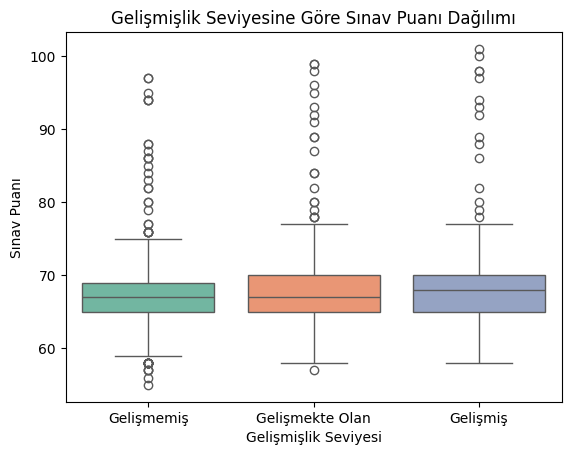

In [107]:
sns.boxplot(
    x='Gelişmişlik_Seviyesi',
    y='Exam_Score',
    data=df,
    hue='Gelişmişlik_Seviyesi',
    palette="Set2",
    legend=False
)
plt.title('Gelişmişlik Seviyesine Göre Sınav Puanı Dağılımı')
plt.xlabel('Gelişmişlik Seviyesi')
plt.ylabel('Sınav Puanı')
plt.show()

Gelişmişlik seviyesine göre öğrencilerin sınav puanlarının dağılımı ve merkezi eğilimi karşılaştırılmaktadır.
Sonuç olarak, gelişmişlik seviyesi arttıkça sınav puanlarının medyanında hafif bir artış gözlemlenmektedir.

#  Aile Gelirine Göre Sınav Puanı Dağılımı (Boxplot)

Öğrencilerin "Aile Gelir Seviyesi"ne (Family_Income) göre sınav puanlarının dağılımı boxplot ile görselleştirilmiştir. Bu grafik, farklı gelir seviyelerinin sınav başarısı üzerindeki etkisini analiz etmek için kullanılmıştır.

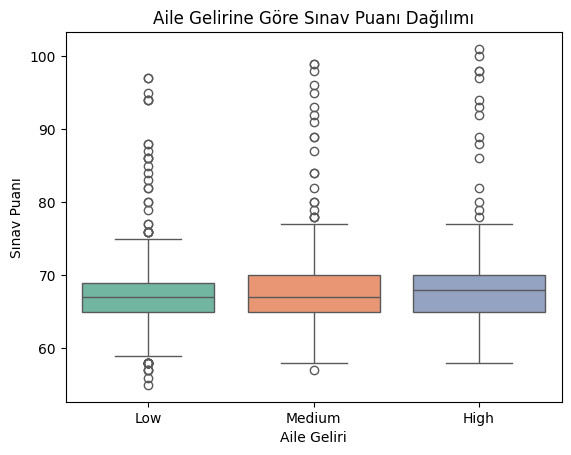

In [108]:
sns.boxplot(
    x='Family_Income',
    y='Exam_Score',
    data=df,
    hue='Family_Income',
    palette="Set2",
    legend=False
)
plt.title('Aile Gelirine Göre Sınav Puanı Dağılımı')
plt.xlabel('Aile Geliri')
plt.ylabel('Sınav Puanı')
plt.show()

Aile gelir düzeylerine göre öğrencilerin sınav puanlarının dağılımı gösterilmektedir.
Sonuç olarak, aile geliri arttıkça sınav puanlarının dağılımında belirgin bir değişiklik görülmemektedir.

# Ebeveyn Katılımına Göre Sınav Puanı Dağılımı (Boxplot)

Öğrencilerin ebeveyn katılım düzeylerine ("Parental_Involvement") göre sınav puanlarının dağılımı boxplot ile görselleştirilmiştir. Bu grafik, ebeveyn katılımının sınav başarısına etkisini analiz etmek için kullanılmıştır.

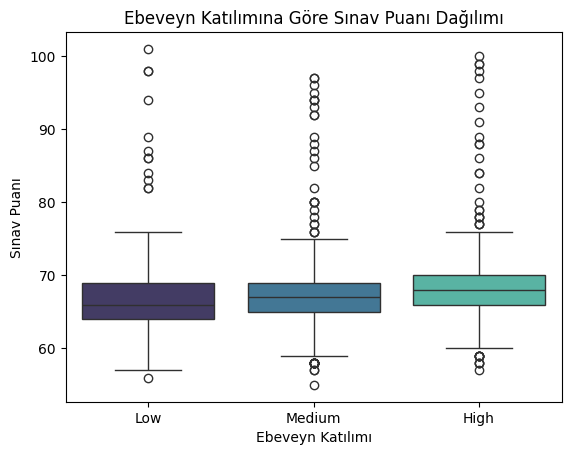

In [109]:
sns.boxplot(
    x='Parental_Involvement',
    y='Exam_Score',
    data=df,
    hue='Parental_Involvement',
    palette="mako",
    legend=False
)
plt.title('Ebeveyn Katılımına Göre Sınav Puanı Dağılımı')
plt.xlabel('Ebeveyn Katılımı')
plt.ylabel('Sınav Puanı')
plt.show()

Ebeveyn katılım düzeyine göre öğrencilerin sınav puanlarının dağılımı görselleştirilmiştir.
Sonuç olarak, ebeveyn katılımı yüksek olan grupta medyan sınav puanının biraz daha yüksek olduğu gözlenmektedir.

#  Kaynak Erişimine Göre Sınav Puanı Dağılımı (Boxplot)

Öğrencilerin "Kaynak Erişimi" (Access_to_Resources) seviyelerine göre sınav puanlarının dağılımı boxplot ile görselleştirilmiştir. Bu grafik, farklı kaynak erişim seviyelerinin sınav başarısı üzerindeki etkisini incelemek için kullanılmıştır.

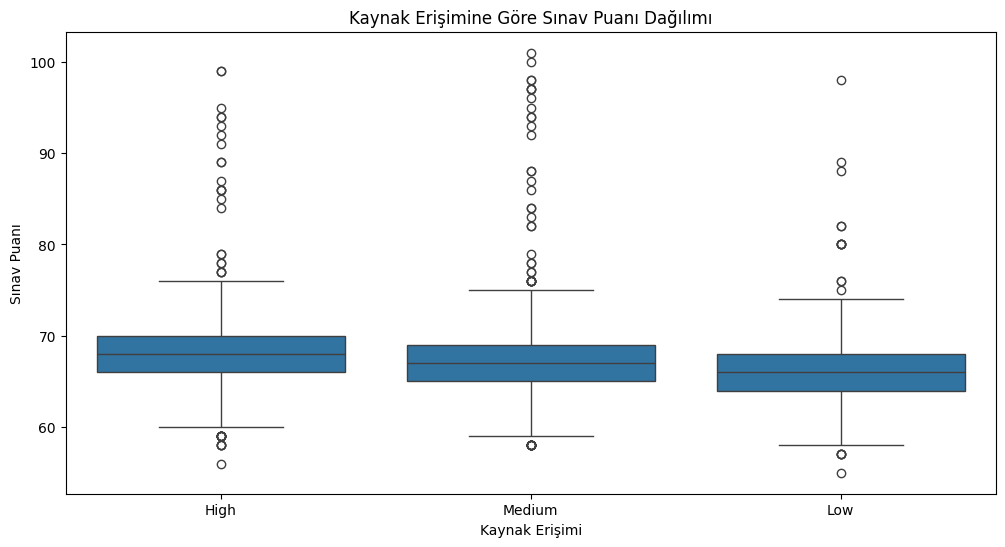

In [110]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Access_to_Resources', y='Exam_Score', data=df)
plt.title('Kaynak Erişimine Göre Sınav Puanı Dağılımı')
plt.xlabel('Kaynak Erişimi')
plt.ylabel('Sınav Puanı')
plt.show()

Kaynak erişim düzeylerine göre öğrencilerin sınav puanlarının dağılımı gösterilmektedir.
Sonuç olarak, kaynak erişimi yüksek olan grupta sınav puanlarının medyanı biraz daha yüksek olsa da, genel olarak tüm gruplarda benzer bir dağılım gözlemlenmektedir.

#  Sınav Puanı (Exam_Score) Dağılımı (Histogram)

Aşağıdaki histogram grafik, öğrencilerin sınav puanlarının ("Exam_Score") dağılımını göstermektedir. KDE (yoğunluk eğrisi) ile puanların yoğunluğu da ayrıca görselleştirilmiştir.

Veri setinin temel istatistiklerini ve sınav puanlarının genel dağılımını inceliyoruz. Böylece öğrencilerin başarı durumları hakkında genel bir fikir ediniyoruz.

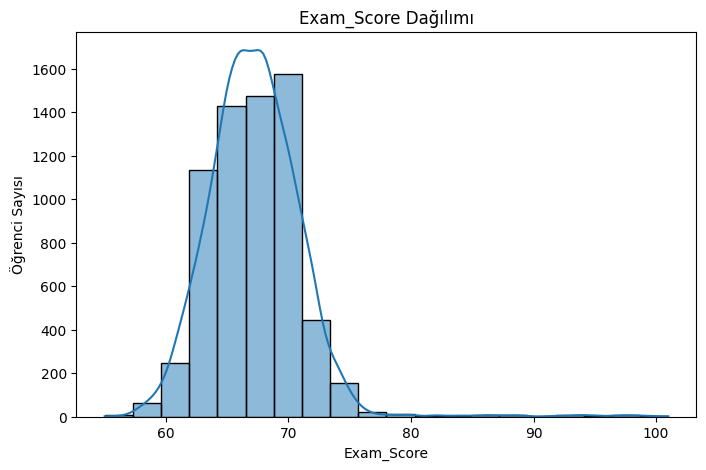

In [111]:
plt.figure(figsize=(8,5))
sns.histplot(df['Exam_Score'], bins=20, kde=True)
plt.title('Exam_Score Dağılımı')
plt.xlabel('Exam_Score')
plt.ylabel('Öğrenci Sayısı')
plt.show()

Bu histogram ve yoğunluk grafiğinde öğrencilerin sınav puanlarının dağılımı gösterilmektedir. Sonuç olarak, sınav puanlarının büyük çoğunluğu 65-72 aralığında yoğunlaşmakta ve dağılım sağa çarpık bir yapı sergilemektedir.

Görüldüğü üzere, öğrencilerin sınav puanları genellikle orta seviyede toplanmıştır. Yüksek başarıya sahip öğrenci oranı ise düşüktür. Bundan sonraki adımda, sınav puanını etkileyen faktörlerin ilişkisini inceleyeceğiz.

#  Sınav Puanı ve Sayısal Özellikler Arasındaki Dağılımlar (Scatterplot)

Aşağıdaki grafikler, sınav puanı (Exam_Score) ile temel sayısal değişkenler arasındaki ilişkileri görselleştirir. Her bir alt grafikte (scatterplot), ilgili değişken ile sınav puanı arasındaki potansiyel doğrusal veya doğrusal olmayan ilişkiler gözlemlenebilir.

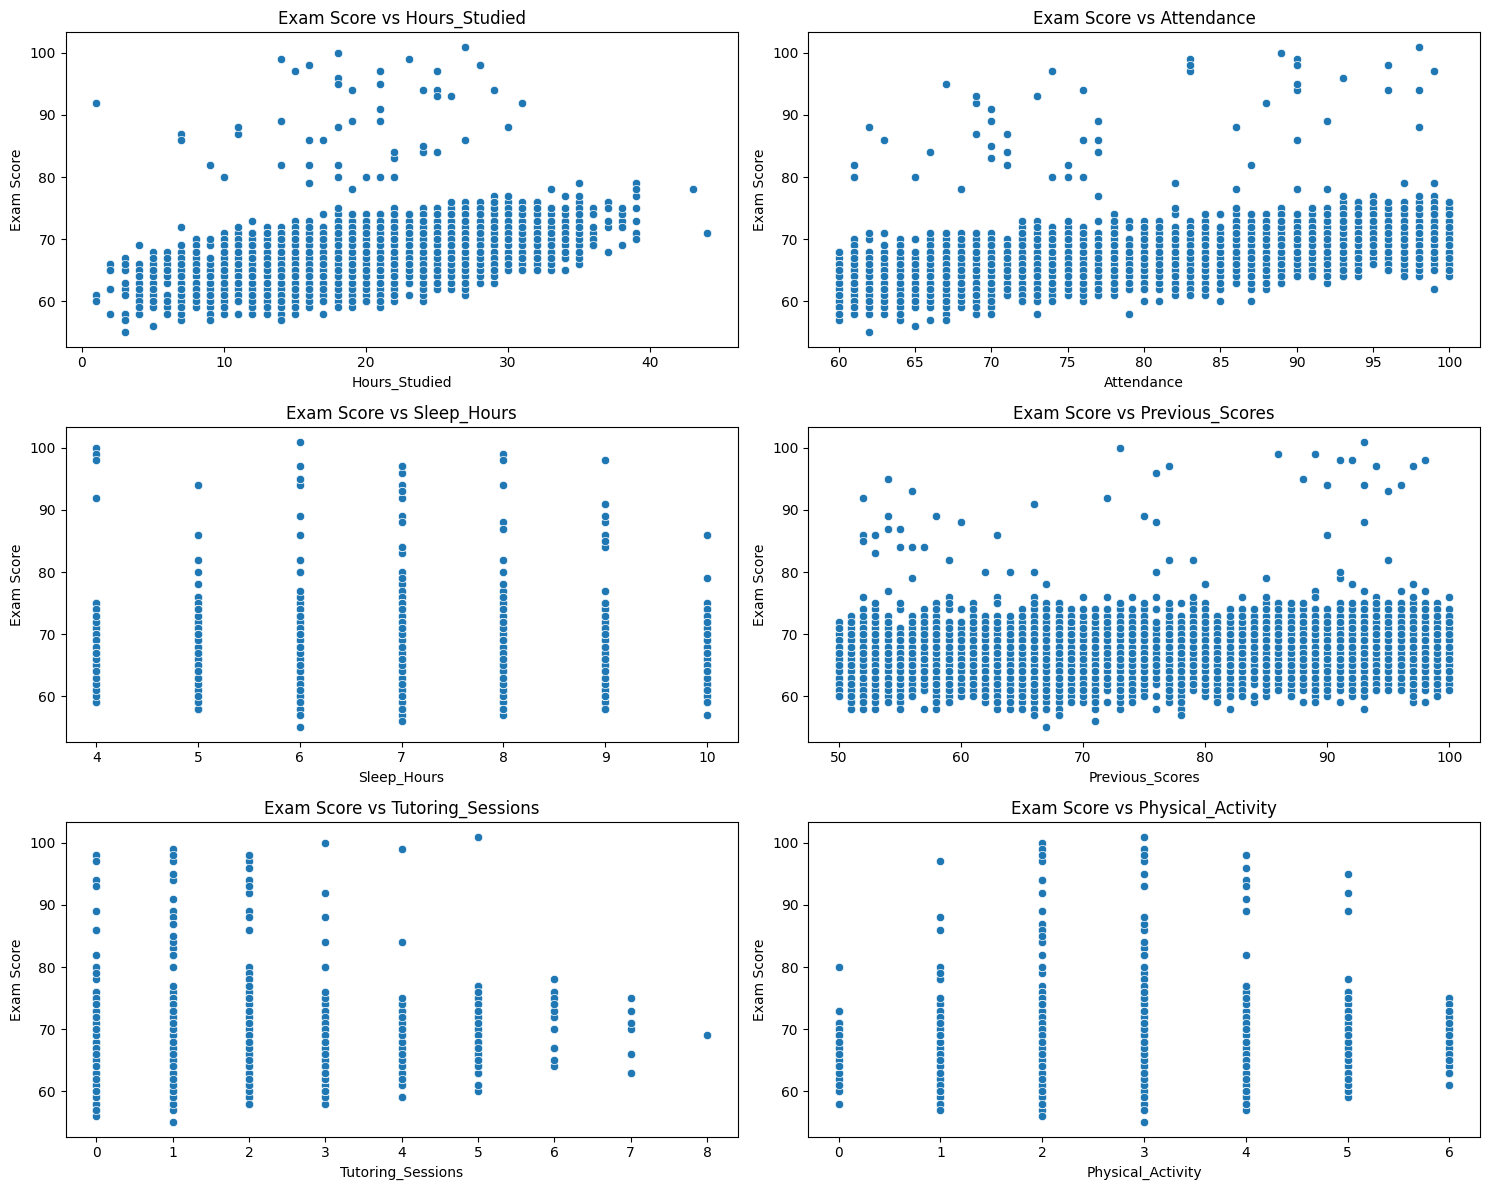

In [112]:
num_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']

plt.figure(figsize=(15, 12))

for i, feature in enumerate(num_features):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=df[feature], y=df['Exam_Score'])
    plt.title(f'Exam Score vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Exam Score')

plt.tight_layout()
plt.show()

Farklı değişkenlerle (çalışma saati, devamsızlık, uyku, önceki notlar, etüt ve fiziksel aktivite) sınav puanları arasındaki ilişkiler gösterilmiştir.
Çalışma saati, devamsızlık ve önceki notlar ile sınav puanları arasında pozitif bir ilişki gözlenirken, diğer değişkenlerde belirgin bir ilişki yoktur.

# Sayısal Değişkenler Arası Korelasyon Matrisi Görselleştirmesi

Veri setindeki sayısal değişkenler arasındaki korelasyonların gücü ve yönü, ısı haritası (heatmap) ile görselleştirilmiştir. Bu analiz, değişkenler arasındaki ilişkilere hızlıca genel bir bakış sunar.

Sınav puanı ile diğer değişkenler arasındaki ilişkileri anlamak için korelasyon analizi yapıyoruz. Böylece hangi değişkenlerin sınav başarısıyla güçlü veya zayıf ilişkisi olduğunu ortaya koyabiliriz.

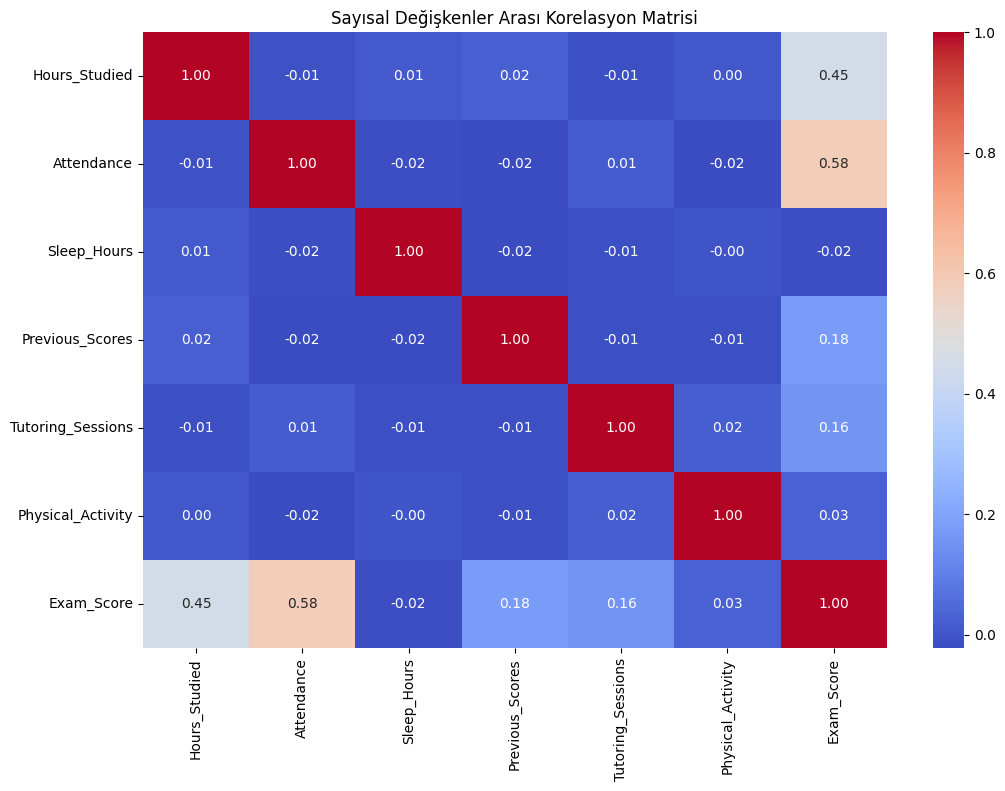

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sayısal Değişkenler Arası Korelasyon Matrisi')
plt.show()

Korelasyon matrisi, sayısal değişkenler arasındaki ilişkileri göstermektedir.
Sınav puanı ile en güçlü pozitif korelasyonun “Attendance” (0.58) ve “Hours_Studied” (0.45) değişkenlerinde olduğu görülmektedir. Diğer değişkenlerle sınav puanı arasında belirgin bir ilişki yoktur.

"Önemli değişkenler ile sınav puanı arasındaki ilişkiler, değişkenin türüne göre uygun grafiklerle (kategorik değişkenler için boxplot, sayısal değişkenler için scatterplot) görselleştirilmiş ve sınav başarısına etkileri incelenmiştir."

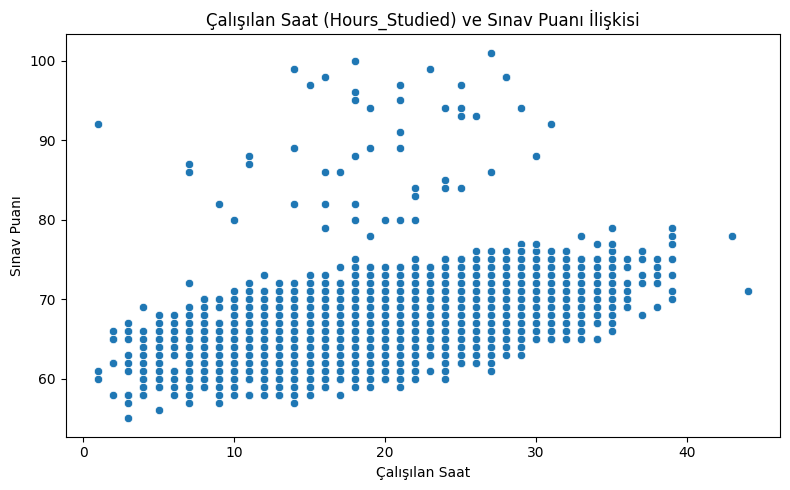

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Çalışılan Saat (Hours_Studied) ve Sınav Puanı İlişkisi')
plt.xlabel('Çalışılan Saat')
plt.ylabel('Sınav Puanı')
plt.tight_layout()
plt.show()

“Hours_Studied” sürekli bir değişken olduğundan, bu değişken ile sınav puanı arasındaki ilişki scatterplot ile görselleştirilmiştir. Grafik incelendiğinde, öğrencilerin çalışmaya ayırdığı saat arttıkça sınav puanlarının genel olarak yükseldiği gözlemlenmiştir. Bu durum, düzenli ve fazla çalışan öğrencilerin sınavda daha başarılı olma eğiliminde olduğunu göstermektedir.

# Kategorik Değişkenlerin One-Hot Encoding ile Dönüştürülmesi

Veri setindeki kategorik değişkenler, makine öğrenmesi modellerinde kullanılabilmesi için one-hot encoding yöntemiyle (get_dummies) sayısal formatlara dönüştürülmüştür. drop_first=True parametresi ile her değişken için ilk kategori atılarak çoklu doğrusal bağlantı (dummy variable trap) riski azaltılmıştır.

In [115]:
df_encoded = pd.get_dummies(df, drop_first=True)

#  Özellik (X) ve Hedef (y) Değişkenlerinin Ayrılması

One-hot encoding ile sayısal formata dönüştürülen veri çerçevesinde, modelleme için bağımsız değişkenler (özellikler, X) ve bağımlı değişken (hedef, y) aşağıdaki şekilde ayrılmıştır:

In [116]:
X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

#  Eğitim ve Test Veri Setlerinin Ayrılması (train_test_split)

Modelin başarısını değerlendirmek için veri seti eğitim ve test olarak ikiye ayrılmıştır. Burada %80 eğitim, %20 test oranı kullanılmış ve sonuçların tekrarlanabilir olması için random_state=42 parametresi verilmiştir.

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Farklı Regresyon Modellerinin Karşılaştırılması

Veri setindeki bağımsız değişkenler ile sınav puanını (Exam_Score) tahmin etmek amacıyla üç farklı regresyon modeli (Linear Regression, Random Forest, XGBoost) eğitilmiş ve test verisi üzerinde değerlendirilmiştir. Modellerin başarım ölçütleri olarak MAE, RMSE ve R² kullanılmıştır. Sonuçlar tablo halinde özetlenmiştir.

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Model Karşılaştırması

Öğrenci sınav başarısını tahmin etmek amacıyla birden fazla makine öğrenmesi modeli eğitilmiştir. Bu bölümde, Linear Regression, Random Forest ve XGBoost modellerinin performansları karşılaştırılmıştır. Modellerin başarısı; R², MAE (Mean Absolute Error) ve RMSE (Root Mean Squared Error) gibi metriklerle değerlendirilmiş ve sonuçlar tablo halinde sunulmuştur.

In [119]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2})

results_df = pd.DataFrame(results)
print(results_df)

               Model       MAE      RMSE        R2
0  Linear Regression  0.452392  1.804445  0.769650
1      Random Forest  1.160371  2.207824  0.655150
2            XGBoost  1.037999  2.225421  0.649631


# Farklı Modellerin Performans Karşılaştırması (Bar Grafik)

Üç farklı regresyon modelinin (Linear Regression, Random Forest, XGBoost) başarı ölçütleri (MAE, RMSE, R2) çubuk grafik ile görselleştirilmiştir. Grafik, modellerin performanslarının daha anlaşılır şekilde karşılaştırılmasını sağlar.

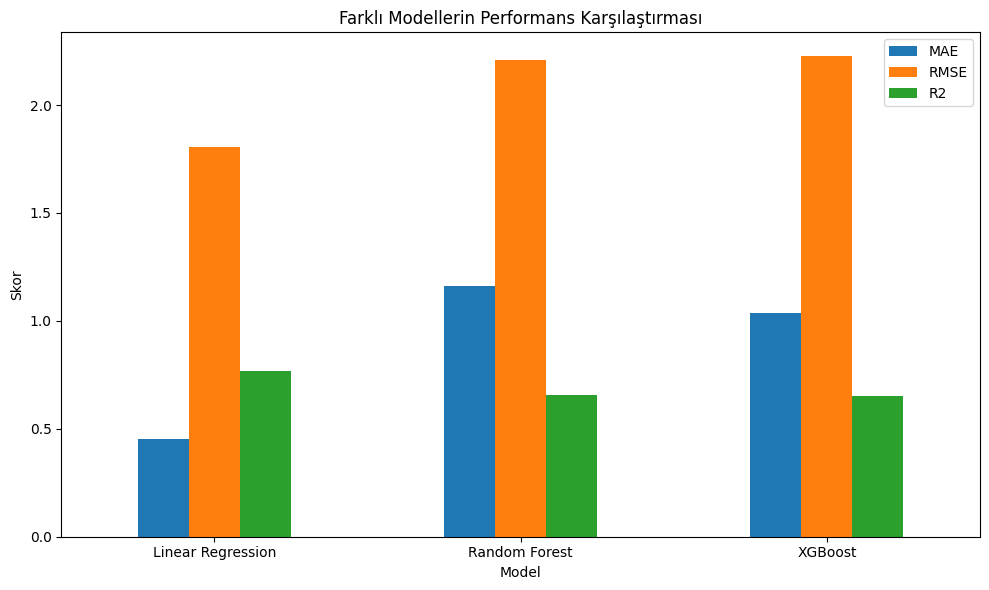

In [120]:
results_df.set_index('Model')[['MAE', 'RMSE', 'R2']].plot(kind='bar', figsize=(10,6))
plt.title('Farklı Modellerin Performans Karşılaştırması')
plt.ylabel('Skor')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Farklı modellerin (Linear Regression, Random Forest, XGBoost) MAE, RMSE ve R2 skorları karşılaştırılmıştır.
Sonuç olarak, Linear Regression modeli en düşük hata (MAE ve RMSE) ve en yüksek R2 skoruna sahiptir; bu da diğer modellere göre daha iyi performans göstermektedir.

#  Doğrusal Regresyona Göre En Önemli 10 Özellik (Barplot)

Aşağıdaki çubuk grafik, doğrusal regresyon modelinin katsayılarına göre sınav başarısını en çok etkileyen ilk 10 özelliği göstermektedir.

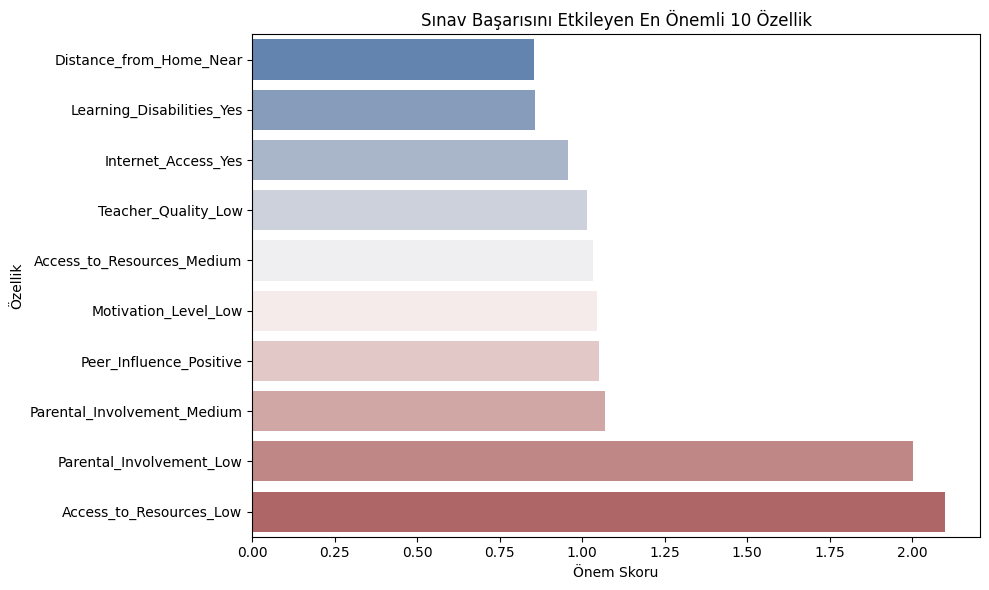

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
feat_imp = pd.DataFrame({
    "feature": [
        "Access_to_Resources_Low",
        "Parental_Involvement_Low",
        "Parental_Involvement_Medium",
        "Peer_Influence_Positive",
        "Motivation_Level_Low",
        "Access_to_Resources_Medium",
        "Teacher_Quality_Low",
        "Internet_Access_Yes",
        "Learning_Disabilities_Yes",
        "Distance_from_Home_Near"
    ],
    "importance": [
        2.101150,
        2.001684,
        1.069448,
        1.051673,
        1.043881,
        1.031581,
        1.015959,
        0.958665,
        0.857212,
        0.854336
    ]
})

feat_imp = feat_imp.sort_values("importance", ascending=True)

plt.figure(figsize=(10,6))
sns.barplot(
    y='feature',
    x='importance',
    data=feat_imp,
    hue='feature',
    palette="vlag",
    legend=False
)
plt.title('Sınav Başarısını Etkileyen En Önemli 10 Özellik')
plt.xlabel('Önem Skoru')
plt.ylabel('Özellik')
plt.tight_layout()
plt.show()

En önemli 10 özelliğin (doğrusal regresyon modeline göre) sıralandığı bu grafikte, “Kaynaklara Erişim” ve “Ebeveyn Katılımı” düşük seviyede olduğunda model tarafından en önemli faktörler olarak belirlenmiştir.
Sonuç olarak, öğrencilerin başarısını en çok etkileyen değişkenler arasında kaynak ve ebeveyn desteği öne çıkmaktadır.

# Random Forest Regresyon ile Modelleme ve Özellik Önem Dereceleri

Random Forest regresyon modeli ile sınav puanı tahmini yapılmış, modelin başarısı MSE ve R² ile değerlendirilmiş ve modelin en önemli 10 özelliği aşağıdaki çubuk grafik ile görselleştirilmiştir.

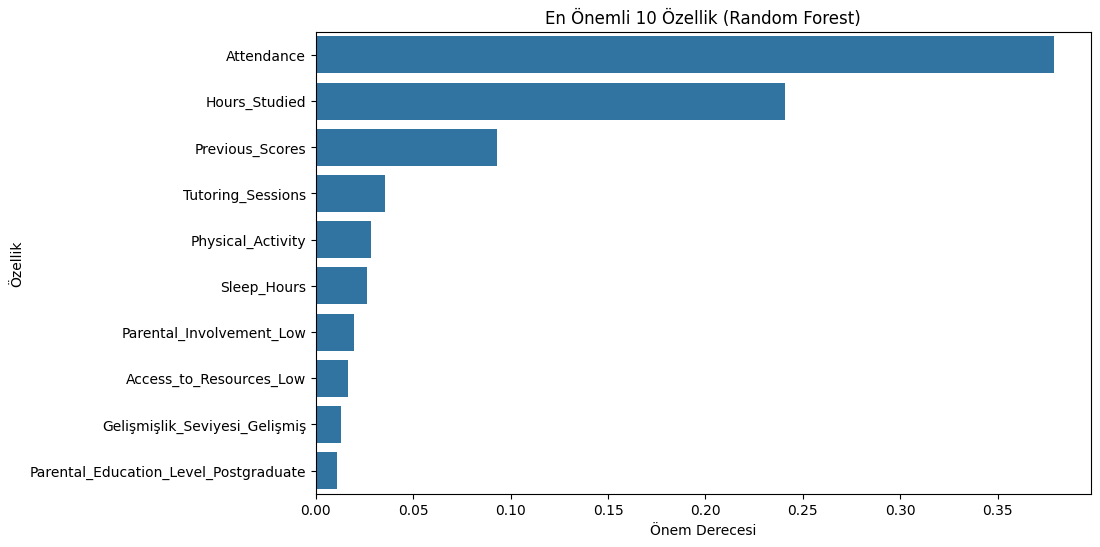

In [122]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=rf_importances.head(10))
plt.title('En Önemli 10 Özellik (Random Forest)')
plt.xlabel('Önem Derecesi')
plt.ylabel('Özellik')
plt.show()

Random Forest modeline göre en önemli 10 özelliğin gösterildiği bu grafikte, “Attendance” (devam durumu), “Hours_Studied” (çalışma saati) ve “Previous_Scores” (önceki notlar) sınav başarısını en çok etkileyen faktörler olarak öne çıkmaktadır.
Sonuç olarak, öğrencinin derse devamı ve çalışma süresi model tarafından en belirleyici değişkenler olarak belirlenmiştir.

#  Doğrusal Regresyon Modelinin Performans Değerlendirmesi

Aşağıdaki kod parçası, doğrusal regresyon modelinin test veri setindeki tahminlerinin başarısını değerlendirmek için Ortalama Kare Hatası (Mean Squared Error, MSE) ve R² Skoru (R2 Score) hesaplar ve ekrana yazdırır.

In [138]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 3.2560199870428943
R2 Score: 0.7696495724907312


#  Random Forest Modelinin Performans Değerlendirmesi

Aşağıdaki kod parçası, random forest modelinin test veri setindeki tahminlerinin başarısını değerlendirmek için Ortalama Kare Hatası (Mean Squared Error, MSE) ve R² Skoru (R2 Score) hesaplar ve ekrana yazdırır.

In [124]:
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Random Forest MSE: 4.874485552193646
Random Forest R2: 0.6551495889755518


#  Model Karşılaştırma Sonuçları (Linear Regression vs Random Forest)

Aşağıdaki tablo, Doğrusal Regresyon ve Random Forest modellerinin test veri setindeki Ortalama Kare Hatası (MSE) ve R² Skoru (R2) değerlerini karşılaştırmalı olarak göstermektedir.

In [125]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE': [
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred_rf)
    ],
    'R2': [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_rf)
    ]
})
print(results)

               Model       MSE       R2
0  Linear Regression  3.256020  0.76965
1      Random Forest  4.874486  0.65515


#  Gerçek ve Tahmin Edilen Sınav Puanlarının Karşılaştırılması (Scatter Plot)

Aşağıdaki scatter plot, test veri seti için modelin tahmin ettiği sınav puanları ile gerçek sınav puanlarının birebir karşılaştırmasını göstermektedir. Kırmızı kesikli çizgi, mükemmel tahmin durumunu (y = x) gösterir.

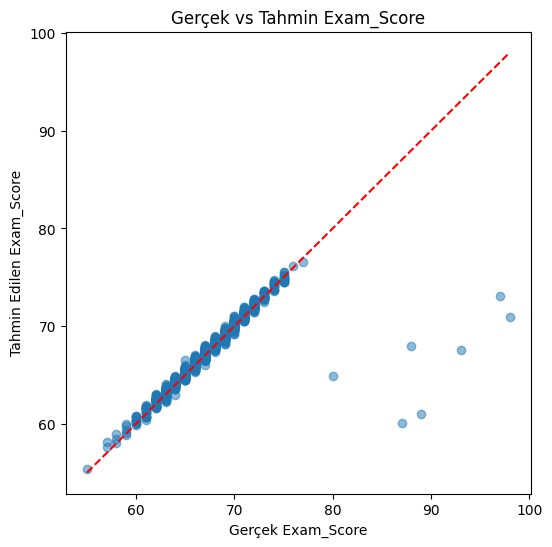

In [126]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Gerçek Exam_Score")
plt.ylabel("Tahmin Edilen Exam_Score")
plt.title("Gerçek vs Tahmin Exam_Score")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

Gerçek ve tahmin edilen sınav puanlarının karşılaştırıldığı bu grafikte, noktaların çoğu kırmızı eşitlik çizgisine yakın konumlanmıştır.
Sonuç olarak, model gerçek sınav puanlarını genel olarak başarılı bir şekilde tahmin etmektedir; ancak yüksek puanlarda tahminlerin gerçeğin altında kaldığı gözlemlenmektedir.

# Sınav Başarısını Etkileyen En Önemli 10 Özellik (Feature Importance Barplot)

Elde edilen model sonuçlarına göre, sınav puanını etkileyen en önemli 10 değişkenin önem dereceleri yatay çubuk grafik ile görselleştirilmiştir.

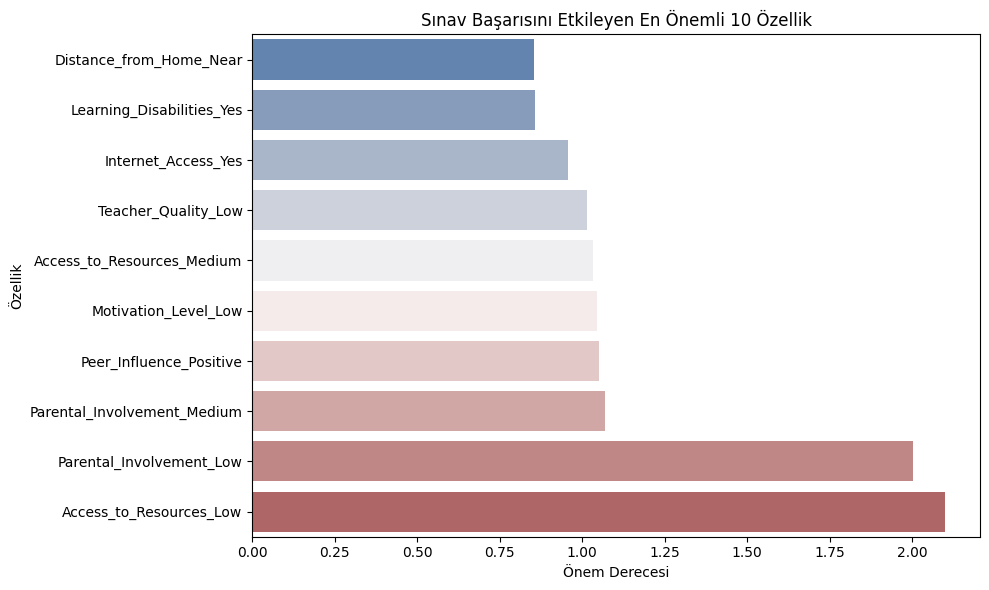

In [139]:
plt.figure(figsize=(10, 6))
sns.barplot(
    y='feature',
    x='importance',
    data=feat_imp,
    hue='feature',
    palette="vlag",
    orient='h'
)
plt.legend([], [], frameon=False)
plt.title('Sınav Başarısını Etkileyen En Önemli 10 Özellik')
plt.xlabel('Önem Derecesi')
plt.ylabel('Özellik')
plt.tight_layout()
plt.show()

Bu grafikte, sınav başarısını etkileyen en önemli 10 özellik gösterilmektedir.
En yüksek öneme sahip değişkenler sırasıyla “Kaynaklara Erişim Düşük”, “Ebeveyn Katılımı Düşük” ve “Aile Geliri Düşük” olarak öne çıkmaktadır.
Sonuç olarak, öğrencilerin başarısında kaynaklara erişim, aile desteği ve gelir düzeyi belirleyici faktörlerdir.

## Sonuç ve Öneriler

### Sonuçlar

Bu çalışma kapsamında, öğrenci başarısını etkileyen faktörler detaylı şekilde analiz edilmiştir. Elde edilen bulgulara göre;

- **Eğitim kaynaklarına erişim**, **ebeveyn katılımı** ve **aile gelir düzeyi**, sınav başarısı üzerinde en belirgin etkiye sahip değişkenler olarak öne çıkmıştır.
- **Düşük aile geliri** ve **yetersiz kaynaklara erişim**, öğrencilerin sınav başarısını olumsuz yönde etkilemektedir.
- **Motivasyon seviyesi** ve **olumlu akran etkisi**, başarıda önemli rol oynamaktadır.
- **Ek ders/takviye alan** ve **internet erişimi bulunan** öğrenciler daha yüksek sınav puanlarına ulaşmıştır.
- **Öğretmen niteliği** ve **öğrencinin öğrenme güçlüğü yaşaması**, başarı üzerinde etkili diğer faktörlerdir.

- **En başarılı model:** (Linear Regression)  

- **Tahmin Modeli Başarısı:** Kurulan modeller (Doğrusal Regresyon ve Random Forest) sınav puanının yaklaşık %77’sini doğru tahmin edebilmiştir.


### Öneriler

- **Eşit kaynak erişimi:** Dezavantajlı öğrencilere eğitim materyali, internet ve ek kaynak desteği sağlanmalı.
- **Aile katılımı artırılmalı:** Okul ve aile arasındaki iletişim güçlendirilerek ebeveynler sürece daha fazla dahil edilmeli.
- **Motivasyon ve rehberlik:** Öğrencilere yönelik motivasyon artırıcı programlar ve rehberlik hizmetleri yaygınlaştırılmalı.
- **Ek destek programları:** Başarı seviyesi düşük ve öğrenme güçlüğü yaşayan öğrenciler için bireysel ve küçük grup destek programları uygulanmalı.
- **Öğretmenlerin mesleki gelişimi:** Öğretmenlerin niteliklerini artıracak hizmet içi eğitim ve seminerler düzenlenmeli.
- **Akran desteği ve sosyal ortamlar:** Olumlu akran ilişkilerini ve sosyal etkinlikleri teşvik eden okul ortamları geliştirilmeli.

Bu öneriler, öğrenci başarısının artırılmasına ve eğitimde fırsat eşitliğinin sağlanmasına katkı sağlayacaktır.

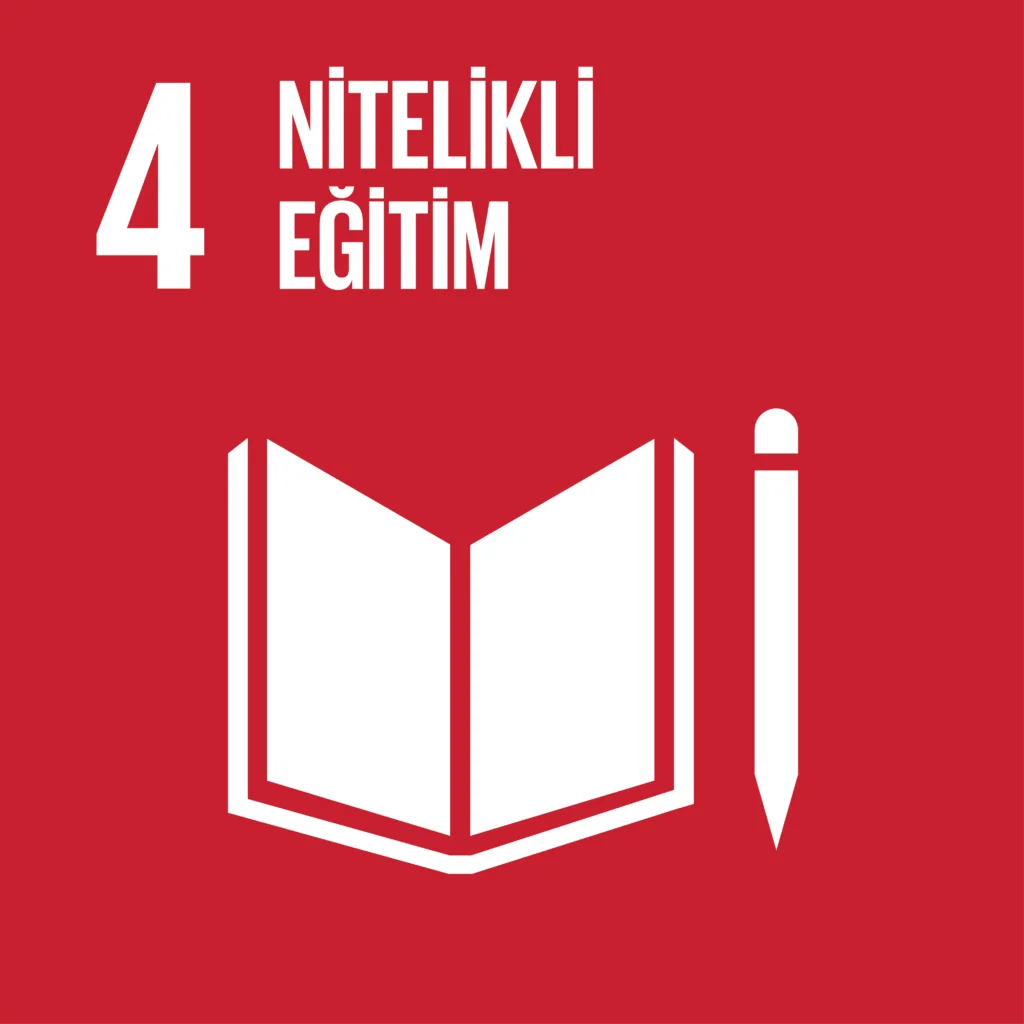